In [1]:
from qiskit_textbook.widgets import bv_widget
bv_widget(2, "11")

HTMLMath(value='$$ |00\\rangle = |00\\rangle $$')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x05\x00\x00\x00\xcc\x08\x06\x00\x00\x00z\x06\xb6…

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

from qiskit.visualization import plot_histogram

In [3]:
n = 3
s = '011'

In [6]:
bv_circuit = QuantumCircuit(n+1, n)

bv_circuit.h(n)
bv_circuit.z(n)

for i in range(n):
    bv_circuit.h(i)

bv_circuit.barrier()

s = s[::-1]
for i in range(n):
    if s[i] == '0':
        bv_circuit.i(i)
    else:
        bv_circuit.cx(i, n)

bv_circuit.barrier()

for i in range(n):
    bv_circuit.h(i)

for i in range(n):
    bv_circuit.measure(i, i)

bv_circuit.draw()


┌───┐      ░ ┌───┐      ░ ┌───┐┌─┐      
q_0: ┤ H ├──────░─┤ I ├──────░─┤ H ├┤M├──────
     ├───┤      ░ └───┘      ░ ├───┤└╥┘┌─┐   
q_1: ┤ H ├──────░───■────────░─┤ H ├─╫─┤M├───
     ├───┤      ░   │        ░ ├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├──────░───┼────■───░─┤ H ├─╫──╫─┤M├
     ├───┤┌───┐ ░ ┌─┴─┐┌─┴─┐ ░ └───┘ ║  ║ └╥┘
q_3: ┤ H ├┤ Z ├─░─┤ X ├┤ X ├─░───────╫──╫──╫─
     └───┘└───┘ ░ └───┘└───┘ ░       ║  ║  ║ 
c: 3/════════════════════════════════╩══╩══╩═
                                     0  1  2

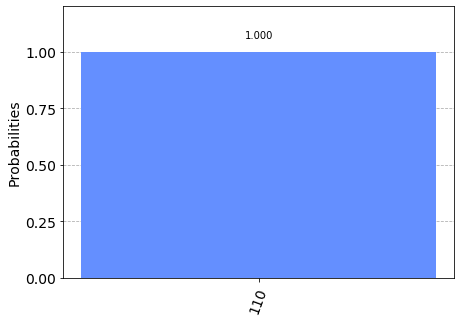

In [12]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(bv_circuit, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

In [13]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()
backend = least_busy(provider.backends(filters= lambda x: x.configuration().n_qubits <= 5 and x.configuration().n_qubits >= 2 and not x.configuration().simulator and x.status().operational == True))

/home/sheff/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [14]:
from qiskit.tools.monitor import job_monitor

shots = 1024
job = execute(bv_circuit, backend=backend, shots=shots)

job_monitor(job, interval = 2)

Job Status: job has successfully run


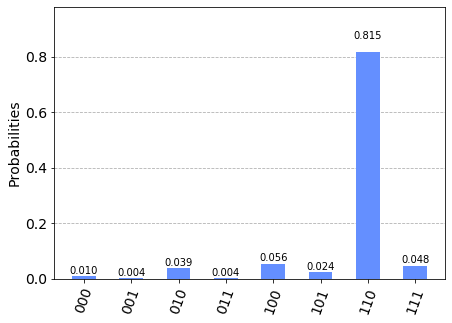

In [15]:
results = job.result()
answer = results.get_counts()

plot_histogram(answer)

In [16]:
a = ['1']*10

In [17]:
a

['1', '1', '1', '1', '1', '1', '1', '1', '1', '1']